# Домашнее задание 2. Классификация изображений.

В этом задании потребуется обучить классификатор изображений. Будем работать с датасетом, название которого раскрывать не будем. Можете посмотреть самостоятельно на картинки, которые в есть датасете. В нём 200 классов и около 5 тысяч картинок на каждый класс. Классы пронумерованы, как нетрудно догадаться, от 0 до 199. Скачать датасет можно вот [тут](https://yadi.sk/d/BNR41Vu3y0c7qA).

Структура датасета простая -- есть директории train/ и val/, в которых лежат обучающие и валидационные данные. В train/ и val/ лежат директориии, соответствующие классам изображений, в которых лежат, собственно, сами изображения.

__Задание__. Необходимо выполнить два задания

1) Добейтесь accuracy **на валидации не менее 0.44**. В этом задании **запрещено** пользоваться предобученными моделями и ресайзом картинок. 5 баллов

2) Добейтесь accuracy **на валидации не менее 0.84**. В этом задании делать ресайз и использовать претрейн можно. 5 баллов

Напишите краткий отчёт о проделанных экспериментах. Что сработало и что не сработало? Почему вы решили, сделать так, а не иначе? Обязательно указывайте ссылки на чужой код, если вы его используете. Обязательно ссылайтесь на статьи / блогпосты / вопросы на stackoverflow / видосы от ютуберов-машинлернеров / курсы / подсказки от Дяди Васи и прочие дополнительные материалы, если вы их используете.

Ваш код обязательно должен проходить все `assert`'ы ниже.

__Использовать внешние данные для обучения строго запрещено в обоих заданиях. Также запрещено обучаться на валидационной выборке__.


__Критерии оценки__: Оценка вычисляется по простой формуле: `min(10, 10 * Ваша accuracy / 0.44)` для первого задания и `min(10, 10 * (Ваша accuracy - 0.5) / 0.34)` для второго. Оценка округляется до десятых по арифметическим правилам.


__Советы и указания__:
 - Наверняка вам потребуется много гуглить о классификации и о том, как заставить её работать. Это нормально, все гуглят. Но не забывайте, что нужно быть готовым за скатанный код отвечать :)
 - Используйте аугментации. Для этого пользуйтесь модулем `torchvision.transforms` или библиотекой [albumentations](https://github.com/albumentations-team/albumentations)
 - Можно обучать с нуля или файнтюнить (в зависимости от задания) модели из `torchvision`.
 - Рекомендуем написать вам сначала класс-датасет (или воспользоваться классом `ImageFolder`), который возвращает картинки и соответствующие им классы, а затем функции для трейна по шаблонам ниже. Однако делать это мы не заставляем. Если вам так неудобно, то можете писать код в удобном стиле. Однако учтите, что чрезмерное изменение нижеперечисленных шаблонов увеличит количество вопросов к вашему коду и повысит вероятность вызова на защиту :)
 - Валидируйте. Трекайте ошибки как можно раньше, чтобы не тратить время впустую.
 - Чтобы быстро отладить код, пробуйте обучаться на маленькой части датасета (скажем, 5-10 картинок просто чтобы убедиться что код запускается). Когда вы поняли, что смогли всё отдебажить, переходите обучению по всему датасету
 - На каждый запуск делайте ровно одно изменение в модели/аугментации/оптимайзере, чтобы понять, что и как влияет на результат.
 - Фиксируйте random seed.
 - Начинайте с простых моделей и постепенно переходите к сложным. Обучение лёгких моделей экономит много времени.
 - Ставьте расписание на learning rate. Уменьшайте его, когда лосс на валидации перестаёт убывать.
 - Советуем использовать GPU. Если у вас его нет, используйте google colab. Если вам неудобно его использовать на постоянной основе, напишите и отладьте весь код локально на CPU, а затем запустите уже написанный ноутбук в колабе. Авторское решение задания достигает требуемой точности в колабе за 15 минут обучения.

Good luck & have fun! :)

**✨ Внимание ✨**

В этом домашнем задании предлагается использовать библиотеку `pytorch_lightning`. Доступ к ее [документации](https://lightning.ai/docs/pytorch/stable/) заблокирован с территории РФ. Вы можете:

1. Получить к ней доступ с помощью VPN.

2. Собрать документацию самостоятельно. Для этого склонируйте [github-репозиторий](https://github.com/Lightning-AI/lightning/tree/master), запустите в нем терминал (на windows – git bash) и выполните команды:

```shell
git submodule update --init --recursive
make docs
```
После этого откройте появившийся файл `docs/build/html/index.html`. Для работы команд в вашем окружении должен быть `pip`. Полная инструкция [по ссылке](https://github.com/Lightning-AI/lightning/tree/master/docs).

3. Гуглить `<error message> pytorch lightning` или `<how to do this> pytorch lightning`. Stack overflow на территории РФ все еще доступен 😉

4. Не пользоваться `pytorch_lightning` и написать цикл обучения модели самостоятельно. Например, по аналогии с функцией `fit` из [семинара 4](https://github.com/hse-ds/iad-deep-learning/blob/master/2023/seminars/04.%20Optim%20%26%20Lightning/04_Optim%26Lightning_solution.ipynb).

In [2]:
# Возможно ниже будет не очень работать WandbLogger с первого разу, перезапустите kernel тетрадки
import wandb

wandb.login()

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [3]:
import math
import os
import random
import sys
from collections import defaultdict, namedtuple

import matplotlib.pyplot as plt
import numpy as np
import pytorch_lightning as pl
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from pytorch_lightning.loggers import WandbLogger
from torch import nn
from torch.nn import functional as F
from torch.utils.data import DataLoader, SubsetRandomSampler
from torchmetrics.functional import accuracy
from torchvision.datasets import ImageFolder
from tqdm import tqdm
import albumentations
import albumentations.pytorch
from torchvision.transforms import transforms
from torch.optim.lr_scheduler import StepLR

device = "cuda" if torch.cuda.is_available() else "cpu"

In [1]:
!pip install pytorch_lightning
!pip install wandb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 805.2/805.2 kB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.6/248.6 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.9 MB/s eta 0:00:00


In [4]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy_test = 0.0
    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)
        with torch.no_grad():
            loss = model(images, labels)
            acc_batch = model.get_accuracy(reset=True)
        accuracy_test += acc_batch
    accuracy_test = accuracy_test / len(test_dataloader)
    return accuracy_test

In [5]:
def seed_everything(seed):
    # Фискирует максимум сидов.
    # Это понадобится, чтобы сравнение оптимизаторов было корректным
    random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True


seed_everything(123456)

In [6]:
!wget https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1 -O dataset.zip && unzip -q dataset.zip

--2023-11-18 00:09:58--  https://www.dropbox.com/s/33l8lp62rmvtx40/dataset.zip?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6031:18::a27d:5112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/33l8lp62rmvtx40/dataset.zip [following]
--2023-11-18 00:09:59--  https://www.dropbox.com/s/dl/33l8lp62rmvtx40/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucba4b0142c6c98fcd6dde048041.dl.dropboxusercontent.com/cd/0/get/CHtJBY-afd-tQ5rZMVRNQIMmTl06nBrdTCX1DN8WXoGsQbQ-FJERcMGKEyCVfCjAN5GzuAxQrU_SexCNNtiXhVOKUiCgbvbNTWUWQ7EG8Aq6hk8iU-cqNI4dlRHNsrieNIm_DmY_mpbtJ9xbu4uDvFHZ/file?dl=1# [following]
--2023-11-18 00:09:59--  https://ucba4b0142c6c98fcd6dde048041.dl.dropboxusercontent.com/cd/0/get/CHtJBY-afd-tQ5rZMVRNQIMmTl06nBrdTCX1DN8WXoGsQbQ-FJERcMGKEyCVfCjAN5GzuAxQrU_SexCNNtiXhVOKUiCgbvbNTWUW

## Задание 0

### Что поможет сделать на 10 из 10 (одно задание - 5 баллов)

1. Использовать все возможные методы оптимизации и эксперемнтировать с ними.
2. Подбор learning rate. Пример из прошлого семинара как это делать: [Как найти lr](https://pytorch-lightning.readthedocs.io/en/1.4.5/advanced/lr_finder.html)

```
  trainer = pl.Trainer(accelerator="gpu", max_epochs=2, auto_lr_find=True)

  trainer.tune(module, train_dataloader, eval_dataloader)

  trainer.fit(module, train_dataloader, eval_dataloader))
```



3. Аугментация данных. [Документация (полезная)](https://pytorch.org/vision/main/transforms.html), а также [библиотека albumentation](https://towardsdatascience.com/getting-started-with-albumentation-winning-deep-learning-image-augmentation-technique-in-pytorch-47aaba0ee3f8)
4. Подбор архитектуры модели.
5. Можно написать модель руками свою в YourNet, а можно импортировать не предобученную сетку известной архитектуры из модуля torchvision.models. Один из способов как можно сделать:

  * `torchvision.models.resnet18(pretrained=False, num_classes=200).to(device)`
  * Документация по возможным моделям и как их можно брать: [Документация (полезная)](https://pytorch.org/vision/stable/models.html)
6. Правильно нормализовывать данные при создании, пример [тык, но тут и в целом гайд от и до](https://www.pluralsight.com/guides/image-classification-with-pytorch)
7. Model Checkpointing. Сохраняйте свой прогресс (модели), чтобы когда что-то пойдет не так вы сможете начать с этого места или просто воспроизвести свои результаты модели, которые обучали.
 * Пример как можно с wandb тут: [Сохраняем лучшие модели в wandb](https://docs.wandb.ai/guides/integrations/lightning)
 * По простому можно так: [Сохраняем модели в pytorch дока](https://pytorch.org/tutorials/beginner/saving_loading_models.html)

### Подготовка данных

In [7]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

val_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)

val_dataloader = DataLoader(val_dataset, batch_size=128, shuffle=False, num_workers=4)

subset_indices = np.arange(1000)

mini_train_dataloader = DataLoader(
    train_dataset,
    batch_size=128,
    sampler=SubsetRandomSampler(subset_indices),
    num_workers=4,
    shuffle=False
)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [8]:
# Just very simple sanity checks
assert isinstance(train_dataset[0], tuple)
assert len(train_dataset[0]) == 2
assert isinstance(train_dataset[1][1], int)
print("tests passed")

tests passed


### Посмотрим на картиночки

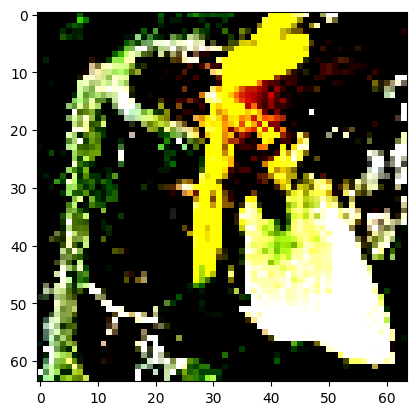

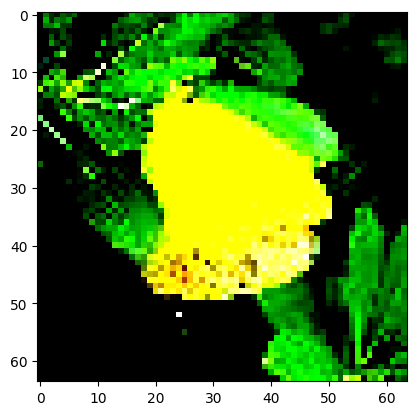

In [ ]:
for batch in val_dataloader:
    images, class_nums = batch
    plt.imshow(images[5].permute(1, 2, 0))
    plt.show()
    plt.imshow(images[19].permute(1, 2, 0))
    plt.show()
    break

## Задание 1.

5 баллов
Добейтесь accuracy на валидации не менее 0.44. В этом задании запрещено пользоваться предобученными моделями и ресайзом картинок.


Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались)
4. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

#### Модель 1 (polished universe)



In [ ]:
class MyNet1(torch.nn.Module):
    def __init__(self, dropout = 0.4):
        super().__init__()
        self.p = dropout
        self.dropout = torch.nn.Dropout(p=self.p)
        self.batch_norm1 = torch.nn.BatchNorm2d(num_features=3)


        self.activation = torch.nn.ReLU()
        self.maxpool = torch.nn.MaxPool2d(kernel_size=2)

        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            self.activation,
            self.maxpool,
        )
        self.batch_norm2 = torch.nn.BatchNorm2d(num_features=32)  # Updated num_features

        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            self.activation,
            self.maxpool,)


        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=12544, out_features=4096),
            torch.nn.BatchNorm1d(num_features=4096),
            self.activation,
            torch.nn.Dropout(p=self.p),
        )

        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=4096, out_features=512),
            torch.nn.BatchNorm1d(num_features=512),
            self.activation,
        )


        self.output = torch.nn.Linear(in_features=512, out_features=200)



        # --------------
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.batch_norm1(x)
        x = self.conv1(x)

        x = self.batch_norm2(x)
        x = self.conv2(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)

        return self.output(x)

    def forward(self, images, target=None):
        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy  = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [ ]:
class MyModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate, momentum = 0.9)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )  # сохраняет логи в папку, но можно несложно добавить wandb
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

In [ ]:
wandb_logger = WandbLogger(log_model='all')

model = MyNet().to(device) # YOUR CODE HERE
module = MyModule1(model, learning_rate = 0.01)

trainer = pl.Trainer(accelerator="gpu", max_epochs=5 ,logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

In [ ]:
accuracy_test = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy_test / 0.44, 0, 10):.2f} баллов")


100%|██████████| 79/79 [00:05<00:00, 15.78it/s]

Оценка за это задание составит 6.60 баллов


https://wandb.ai/eskov/lightning_logs/reports/val_loss-23-11-18-03-36-21---Vmlldzo2MDA1NDYy?accessToken=su8mbndhvxopgvpgef4cg3sa3qseudxav2j4q9na7h3jvye5fo63mg1m9qr30f81

https://wandb.ai/eskov/lightning_logs/reports/train_loss-23-11-18-03-35-55---Vmlldzo2MDA1NDU4?accessToken=5g55zm0f9rlfn2w5ufpyingwxm9mp7ho81jedc57hhthg3k0gp2pibey5vm8puy3

#### Модель 2

In [ ]:
class MyNet2(torch.nn.Module):
    def __init__(self, dropout = 0.4):
        super().__init__()
        self.p = dropout
        self.dropout = torch.nn.Dropout(p=self.p)
        self.batch_norm1 = torch.nn.BatchNorm2d(num_features=3)


        self.activation = torch.nn.ReLU()
        self.maxpool = torch.nn.MaxPool2d(kernel_size=2)

        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            self.activation,
            self.maxpool,
        )
        self.batch_norm2 = torch.nn.BatchNorm2d(num_features=32)  # Updated num_features

        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            self.activation,
            self.maxpool,)

        self.batch_norm3 = torch.nn.BatchNorm2d(num_features=64)

        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            self.activation,
            self.maxpool,)

        self.batch_norm4 = torch.nn.BatchNorm2d(num_features=128)


        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=4608, out_features=2048),
            torch.nn.BatchNorm1d(num_features=2048),
            self.activation,
            torch.nn.Dropout(p=self.p),
        )

        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=2048, out_features=1024),
            torch.nn.BatchNorm1d(num_features=1024),
            self.activation,
        )


        self.output = torch.nn.Linear(in_features=1024, out_features=200)



        # --------------
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.batch_norm1(x)
        x = self.conv1(x)

        x = self.batch_norm2(x)
        x = self.conv2(x)

        x = self.batch_norm3(x)
        x = self.conv3(x)

        x = self.batch_norm4(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)

        return self.output(x)

    def forward(self, images, target=None):
        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy  = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [ ]:
class MyModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate, momentum = 0.9)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )  # сохраняет логи в папку, но можно несложно добавить wandb
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

In [ ]:
wandb_logger = WandbLogger(log_model='all')

model = MyNet().to(device) # YOUR CODE HERE
module = MyModule1(model, learning_rate = 0.01, gamma=0.8)

trainer = pl.Trainer(accelerator="gpu", max_epochs=5 ,logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

In [ ]:
accuracy_test

tensor(0.3274)

In [ ]:
accuracy_test = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy_test / 0.44, 0, 10):.2f} баллов")


  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

100%|██████████| 79/79 [00:06<00:00, 12.85it/s]


Оценка за это задание составит 7.44 баллов


https://wandb.ai/eskov/lightning_logs/reports/val_loss-23-11-18-03-36-21---Vmlldzo2MDA1NDYy?accessToken=su8mbndhvxopgvpgef4cg3sa3qseudxav2j4q9na7h3jvye5fo63mg1m9qr30f81

https://wandb.ai/eskov/lightning_logs/reports/train_loss-23-11-18-03-38-23---Vmlldzo2MDA1NDcw?accessToken=pn5alj4mhmmzg4fumt4mfvdtvota0prymex7p48gd62tjy698o6r66jod72zc18l

#### Модель 3

In [ ]:
class MyNet3(torch.nn.Module):
    def __init__(self, dropout = 0.4):
        super().__init__()
        self.p = dropout
        self.dropout = torch.nn.Dropout(p=self.p)
        self.batch_norm1 = torch.nn.BatchNorm2d(num_features=3)


        self.activation = torch.nn.ReLU()
        self.maxpool = torch.nn.MaxPool2d(kernel_size=2)

        self.conv1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3),
            self.activation,
            self.maxpool,
        )
        self.batch_norm2 = torch.nn.BatchNorm2d(num_features=32)  # Updated num_features

        self.conv2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            self.activation,
            self.maxpool,)

        self.batch_norm3 = torch.nn.BatchNorm2d(num_features=64)

        self.conv3 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            self.activation,
            self.maxpool,)

        self.batch_norm4 = torch.nn.BatchNorm2d(num_features=128)


        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=4608, out_features=2048),
            torch.nn.BatchNorm1d(num_features=2048),
            self.activation,
            torch.nn.Dropout(p=self.p),
        )

        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=2048, out_features=1024),
            torch.nn.BatchNorm1d(num_features=1024),
            self.activation,
        )


        self.output = torch.nn.Linear(in_features=1024, out_features=200)



        # --------------
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.batch_norm1(x)
        x = self.conv1(x)

        x = self.batch_norm2(x)
        x = self.conv2(x)

        x = self.batch_norm3(x)
        x = self.conv3(x)

        x = self.batch_norm4(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)

        return self.output(x)

    def forward(self, images, target=None):
        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy  = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

In [ ]:
class MyModule3(pl.LightningModule):
    def __init__(self, model, learning_rate = 0.001, step_size=1, gamma=0.9, momentum=0.7):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.step_size = step_size
        self.gamma = gamma
        self.momentum = momentum

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)#, momentum=self.momentum)
        scheduler = StepLR(optimizer, step_size=self.step_size, gamma=self.gamma)
        return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "val_loss"}

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

In [ ]:
seed_everything(1337)

wandb_logger = WandbLogger(log_model='all')

model = MyNet().to(device) # YOUR CODE HERE
module = MyModule1(model, learning_rate = 0.001, gamma=0.9)

trainer = pl.Trainer(accelerator="gpu", max_epochs=5 ,logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type  | Params
--------------------------------
0 | model | MyNet | 11.8 M
--------------------------------
11.8 M    Trainable params
0         Non-trainable params
11.8 M    Total params
47.369    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
accuracy_test = evaluate_task(model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy_test / 0.44, 0, 10):.2f} баллов")


100%|██████████| 79/79 [00:05<00:00, 15.54it/s]

Оценка за это задание составит 7.91 баллов


In [ ]:
seed_everything(1337)

wandb_logger = WandbLogger(log_model='all')

model = MyNet().to(device) # YOUR CODE HERE
module = MyModule(model, learning_rate=0.01)

trainer = pl.Trainer(accelerator="gpu", max_epochs=5 ,logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type  | Params
--------------------------------
0 | model | MyNet | 11.8 M
--------------------------------
11.8 M    Trainable params
0         Non-trainable params
11.8 M    Total params
47.369    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
class MyModule(pl.LightningModule):
    def __init__(self, model, learning_rate):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.SGD(self.parameters(), lr=self.learning_rate, momentum = 0.9)
        return optimizer

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log(
            "train_loss", loss, prog_bar=True
        )  # сохраняет логи в папку, но можно несложно добавить wandb
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

In [ ]:
wandb_logger = WandbLogger(log_model='all')

model = MyNet().to(device) # YOUR CODE HERE
module = MyModule(model, learning_rate=0.01)

trainer = pl.Trainer(accelerator="gpu", max_epochs=5 ,logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:634: Checkpoint directory ./lightning_logs/uen1btr9/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type  | Params
--------------------------------
0 | model | MyNet | 11.8 M
------------

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
wandb_logger.save()

In [ ]:
wandb.restore('model.h5', run_path="E/save_and_restore/10pr4joa")

#### Модель 4

In [ ]:
class MyNet4(torch.nn.Module):
    def __init__(self, dropout = 0.4):
        super().__init__()
        self.p = dropout
        self.dropout = torch.nn.Dropout(p=self.p)
        self.batch_norm1 = torch.nn.BatchNorm2d(num_features=3)


        self.activation = torch.nn.ReLU()
        self.maxpool = torch.nn.MaxPool2d(kernel_size=2)

        self.conv1_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3),
            self.activation,
            #self.maxpool,
        )

        self.conv1_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding = 1),
            self.activation,
            #self.maxpool,
        )

        self.batch_norm2 = torch.nn.BatchNorm2d(num_features=64)  # Updated num_features

        self.conv2_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            self.activation,
            #self.maxpool,
        )

        self.conv2_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding = 1),
            self.activation,
            #self.maxpool,
        )


        self.batch_norm3 = torch.nn.BatchNorm2d(num_features=128)

        self.conv3_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3),
            self.activation,
            #torch.nn.MaxPool2d(kernel_size=3),
            )
        self.conv3_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding = 1),
            self.activation,
            #self.maxpool,
        )
        self.batch_norm4 = torch.nn.BatchNorm2d(num_features=256)

        self.conv4_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3),
            self.activation,
            #torch.nn.MaxPool2d(kernel_size=3),
            )
        self.conv4_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding = 1),
            self.activation,
            #self.maxpool,
        )
        self.batch_norm5 = torch.nn.BatchNorm2d(num_features=512)


        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=2048, out_features=2048),
            torch.nn.BatchNorm1d(num_features=2048),
            self.activation,
            torch.nn.Dropout(p=self.p),
        )

        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=2048, out_features=1024),
            torch.nn.BatchNorm1d(num_features=1024),
            self.activation,
            torch.nn.Dropout(p=self.p),
        )


        self.output = torch.nn.Linear(in_features=1024, out_features=200)



        # --------------
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.batch_norm1(x)

        y = self.conv1_1(x)
        x = self.conv1_2(y)
        x = self.maxpool(y + x)
        x = self.batch_norm2(x)

        y = self.conv2_1(x)
        x = self.conv2_2(y)
        x = self.maxpool(y + x)
        x = self.batch_norm3(x)

        y = self.conv3_1(x)
        x = self.conv3_2(y)
        x = self.maxpool(y + x)
        x = self.batch_norm4(x)

        y = self.conv4_1(x)
        x = self.conv4_2(y)
        x = self.maxpool(y + x)
        x = self.batch_norm5(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)

        return self.output(x)

    def forward(self, images, target=None):
        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy  = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

https://wandb.ai/eskov/lightning_logs/reports/val_loss-23-11-18-03-39-10---Vmlldzo2MDA1NDc2?accessToken=0k5btsl830x344diycgzkpp1saif48bx3zsgvumce14brrvf1izdh8gabel0xt9g

https://wandb.ai/eskov/lightning_logs/reports/train_loss-23-11-18-03-39-23---Vmlldzo2MDA1NDc3?accessToken=pp90dzcz45dmzus4zppea7lzgm2t1tyhobgxlkyyfbbwrsr4u8jt4xslkpvntlep

### Модель (или просто импортируйте не предобученную)

In [9]:
class MyNet(torch.nn.Module):
    def __init__(self, dropout = 0.4):
        super().__init__()
        self.p = dropout
        self.dropout = torch.nn.Dropout(p=self.p)
        self.batch_norm1 = torch.nn.BatchNorm2d(num_features=3)


        self.activation = torch.nn.ReLU()
        self.maxpool = torch.nn.MaxPool2d(kernel_size=2)

        self.conv1_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3),
            self.activation,
            #self.maxpool,
        )

        self.conv1_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding = 1),
            self.activation,
            #self.maxpool,
        )

        self.batch_norm2 = torch.nn.BatchNorm2d(num_features=64)  # Updated num_features

        self.conv2_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),
            self.activation,
            #self.maxpool,
        )

        self.conv2_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding = 1),
            self.activation,
            #self.maxpool,
        )


        self.batch_norm3 = torch.nn.BatchNorm2d(num_features=128)

        self.conv3_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3),
            self.activation,
            #torch.nn.MaxPool2d(kernel_size=3),
            )
        self.conv3_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding = 1),
            self.activation,
            #self.maxpool,
        )
        self.batch_norm4 = torch.nn.BatchNorm2d(num_features=256)

        self.conv4_1 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3),
            self.activation,
            #torch.nn.MaxPool2d(kernel_size=3),
            )
        self.conv4_2 = torch.nn.Sequential(
            torch.nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding = 1),
            self.activation,
            #self.maxpool,
        )
        self.batch_norm5 = torch.nn.BatchNorm2d(num_features=512)


        self.fc1 = torch.nn.Sequential(
            torch.nn.Linear(in_features=2048, out_features=2048),
            torch.nn.BatchNorm1d(num_features=2048),
            self.activation,
            torch.nn.Dropout(p=self.p),
        )

        self.fc2 = torch.nn.Sequential(
            torch.nn.Linear(in_features=2048, out_features=1024),
            torch.nn.BatchNorm1d(num_features=1024),
            self.activation,
            torch.nn.Dropout(p=self.p),
        )


        self.output = torch.nn.Linear(in_features=1024, out_features=200)



        # --------------
        self.loss_func = torch.nn.CrossEntropyLoss()
        self.targets = torch.Tensor()
        self.preds = torch.Tensor()

    def _forward(self, x):
        x = self.batch_norm1(x)

        y = self.conv1_1(x)
        x = self.conv1_2(y)
        x = self.maxpool(y + x)
        x = self.batch_norm2(x)

        y = self.conv2_1(x)
        x = self.conv2_2(y)
        x = self.maxpool(y + x)
        x = self.batch_norm3(x)

        y = self.conv3_1(x)
        x = self.conv3_2(y)
        x = self.maxpool(y + x)
        x = self.batch_norm4(x)

        y = self.conv4_1(x)
        x = self.conv4_2(y)
        x = self.maxpool(y + x)
        x = self.batch_norm5(x)

        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)

        return self.output(x)

    def forward(self, images, target=None):
        # images ~ (batch size, num channels, height, width)
        # target ~ (batch size)
        # output ~ (batch size, num classes)
        output = self._forward(images)

        # get accuracy score and save it to self.accuracy
        if target is not None:
            loss = self.loss_func(output, target)

            self.targets = torch.cat((self.targets, target.cpu()), 0)
            pred = torch.argmax(output, dim=-1)
            self.preds = torch.cat((self.preds, pred.cpu()), 0)
            self.accuracy  = accuracy(self.preds.long(), self.targets.long(), task='multiclass', num_classes=200)

        return loss if target is not None else output

    def get_accuracy(self, reset=False):
        # return accuracy by all values till now
        if reset:
            self.targets = torch.Tensor()
            self.preds = torch.Tensor()
        return self.accuracy

### Тренировочный класс lightning

In [ ]:
class MyModule(pl.LightningModule):
    def __init__(self, model, learning_rate = 0.001, step_size=1, gamma=0.9, momentum=0.7):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.step_size = step_size
        self.gamma = gamma
        self.momentum = momentum

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.learning_rate)#, momentum=self.momentum)
        scheduler = StepLR(optimizer, step_size=self.step_size, gamma=self.gamma)
        return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "val_loss"}

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        loss = self.model(images, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        loss = self.model(images, target)
        self.log("val_loss", loss, prog_bar=True)

In [ ]:
seed_everything(1337)

wandb_logger = WandbLogger(log_model='all')

model = MyNet(dropout = 0.15).to(device) # YOUR CODE HERE
module = MyModule(model, learning_rate = 0.0005, gamma=0.8)

trainer = pl.Trainer(accelerator="gpu", max_epochs=5 ,logger=wandb_logger)
trainer.fit(module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type  | Params
--------------------------------
0 | model | MyNet | 11.2 M
--------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.772    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
torch.save(model, '/content/drive/MyDrive/Models/best_model.pth')

### Валидация результатов задания

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
seed_everything(1337)
loaded_model = torch.load('/content/drive/MyDrive/Models/best_model.pth')
accuracy_test = evaluate_task(loaded_model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * accuracy_test / 0.44, 0, 10):.2f} баллов")

  0%|          | 0/79 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
100%|██████████| 79/79 [00:07<00:00, 10.47it/s]


Оценка за это задание составит 9.24 баллов


https://wandb.ai/eskov/lightning_logs/reports/val_loss-23-11-18-03-15-43---Vmlldzo2MDA1MzY1

https://wandb.ai/eskov/lightning_logs/reports/train_loss-23-11-18-03-16-14---Vmlldzo2MDA1Mzcw



## Задание 2

5 баллов
Добейтесь accuracy на валидации не менее 0.84. В этом задании делать ресайз и использовать претрейн можно.

Для того чтобы выбить скор (считается ниже) на 2.5/5 балла (то есть половину за задание) достаточно соблюдать пару простых жизненных правил:
1. Аугментация (без нее сложно очень будет)
2. Оптимайзеры можно (и нужно) использовать друг с другом. Однако когда что-то проверяете, то не меняйте несколько параметров сразу - собьете логику экспериментов
3. Не используйте полносвязные модели или самые первые сверточные, используйте более современные архитектуры (что на лекциях встречались или можете пойти дальше).
4. Попробуйте сначала посмотреть качество исходной модели без дообучения, сохраните как baseline. Отсюда поймете какие слои нужно дообучать.
5. Посмотреть все ноутбуки прошедших семинаров и слепить из них что-то общее. Семинарских тетрадок хватит сверх

#### Основная модель

In [21]:
resize_dims = (224, 224)
scale_range = (0.8, 1.0)  # Диапазон изменения размера
ratio_range = (0.8, 1.2)  # Диапазон изменения соотношения сторон

# Создайте объект RandomResizedCrop с указанными параметрами
random_resized_crop = transforms.RandomResizedCrop(size=(32, 32), scale=scale_range, ratio=ratio_range)

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    #transforms.RandomVerticalFlip(),
    #transforms.RandomResizedCrop(size=resize_dims, scale=scale_range, ratio=ratio_range),
    #transforms.RandomPosterize(bits=2),
    transforms.Resize(size=resize_dims),
    transforms.RandomRotation(degrees=30),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

val_transform = transforms.Compose([
    transforms.Resize(size=resize_dims),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

subset_indices = np.arange(1000)

mini_train_dataloader = DataLoader(
    train_dataset,
    batch_size=128,
    sampler=SubsetRandomSampler(subset_indices),
    num_workers=4,
    shuffle=False
)


In [ ]:
from torchvision import models

class MyGoogleNetModule(pl.LightningModule):
    def __init__(self, model, learning_rate=0.001, step_size=1, gamma=0.9, momentum=0.7, weight_decay = 0, Adam = True):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.step_size = step_size
        self.gamma = gamma
        self.weight_decay = weight_decay
        self.momentum = momentum
        self.Adam = Adam

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizers(self):
        # Извлекаем параметры для оптимизации
        parameters_to_optimize = filter(lambda p: p.requires_grad, self.model.parameters())
        if self.Adam:
            optimizer = torch.optim.Adam(parameters_to_optimize, lr=self.learning_rate, weight_decay =self.weight_decay)
        else:
            optimizer = torch.optim.SGD(parameters_to_optimize, lr=self.learning_rate, weight_decay =self.weight_decay, momentum = self.moentum)
        scheduler = StepLR(optimizer, step_size=self.step_size, gamma=self.gamma)

        return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "val_loss"}

    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        output = self.model(images)
        loss = F.cross_entropy(output, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        output = self.model(images)
        loss = F.cross_entropy(output, target)
        self.log("val_loss", loss, prog_bar=True)


In [13]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy_test = 0.0
    total_batches = len(test_dataloader)

    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)

        # Compute accuracy
        predicted_labels = torch.argmax(outputs, dim=1)
        correct_predictions = (predicted_labels == labels).sum().item()
        acc_batch = correct_predictions / labels.size(0)  # Accuracy per batch
        accuracy_test += acc_batch

    accuracy_test = accuracy_test / total_batches  # Average accuracy over all batches
    return accuracy_test


In [ ]:

# Загрузка предварительно обученной GoogleNet модели
google_net_model = models.googlenet(pretrained=True)
google_net_model.aux_logits = False  # Отключаем вспомогательные выходы

# Заменяем последний fully connected слой для адаптации к новому числу классов
google_net_model.fc = torch.nn.Linear(in_features=1024, out_features=200)



#Запретим считать градиент везде кроме послднего слоя:

for param in google_net_model.parameters():
    param.requires_grad = False


for param in google_net_model.fc.parameters():
    param.requires_grad = True

# Создаем модуль PyTorch Lightning
google_net_module = MyGoogleNetModule(model=google_net_model, learning_rate=0.0005, gamma=0.7)

wandb_logger = WandbLogger(log_model='all')
trainer = pl.Trainer(accelerator="gpu", max_epochs=3, logger=wandb_logger)
trainer.fit(google_net_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params
------------------------------------
0 | model | GoogLeNet | 5.8 M 
------------------------------------
205 K     Trainable params
5.6 M     Non-trainable params
5.8 M     Total params
23.220    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
torch.save(google_net_model, '/content/drive/MyDrive/Models/google_pretrained_resized224.pth')

In [ ]:
google_net_model = torch.load( '/content/drive/MyDrive/Models/google_pretrained_resized224.pth')
for param in google_net_model.parameters():
    param.requires_grad = True
google_net_module = MyGoogleNetModule(model=google_net_model, learning_rate=0.0001, gamma=0.5, Adam = True)

# Инициализация PyTorch Lightning Trainer
trainer = pl.Trainer(accelerator="gpu", max_epochs=5, logger=wandb_logger)
trainer.fit(google_net_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory ./lightning_logs/mzqjk7c4/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params
------------------------------------
0 | model | GoogLeNet | 5.8 M 
------------------------------------
5.8 M     Trainable params
0         Non-trainable params
5.8 M     Total params
23.220    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
torch.save(google_net_model, '/content/drive/MyDrive/Models/google_pretrained_resized224_v2.pth')

In [ ]:
resize_dims = (224, 224)
scale_range = (0.8, 1.0)
ratio_range = (0.8, 1.2)

# Создайте объект RandomResizedCrop с указанными параметрами
random_resized_crop = transforms.RandomResizedCrop(size=(32, 32), scale=scale_range, ratio=ratio_range)

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    #transforms.RandomVerticalFlip(),
    #transforms.RandomResizedCrop(size=resize_dims, scale=scale_range, ratio=ratio_range),
    #transforms.RandomPosterize(bits=2),
    transforms.Resize(size=resize_dims),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

val_transform = transforms.Compose([
    transforms.Resize(size=resize_dims),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
wandb_logger = WandbLogger(log_model='all')
google_net_model = torch.load('/content/drive/MyDrive/Models/google_pretrained_resized224_v2.pth')

google_net_module = MyGoogleNetModule(model=google_net_model.to(device), learning_rate=0.00001, gamma=0.1, step_size = 1, weight_decay = 1e-7)

# Инициализация PyTorch Lightning Trainer
trainer = pl.Trainer(accelerator="gpu", max_epochs=2, logger=wandb_logger)
trainer.fit(google_net_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory ./lightning_logs/mzqjk7c4/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params
------------------------------------
0 | model | GoogLeNet | 5.8 M 


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


In [ ]:
torch.save(google_net_model, '/content/drive/MyDrive/Models/google_pretrained_resized224_v3.pth')

In [ ]:
resize_dims = (224, 224)
scale_range = (0.8, 1.0)
ratio_range = (0.8, 1.2)

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),

    #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    #transforms.RandomVerticalFlip(),
    #transforms.RandomResizedCrop(size=resize_dims, scale=scale_range, ratio=ratio_range),
    #transforms.RandomPosterize(bits=2),
    transforms.Resize(size=resize_dims),
    transforms.RandomResizedCrop(size=resize_dims, scale=scale_range, ratio=ratio_range),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

In [ ]:
wandb_logger = WandbLogger(log_model='all')
google_net_model = torch.load('/content/drive/MyDrive/Models/google_pretrained_resized224_v3.pth')

google_net_module = MyGoogleNetModule(model=google_net_model.to(device), learning_rate=0.00001, gamma=0.9, step_size = 1, weight_decay = 1e-7)

# Инициализация PyTorch Lightning Trainer
trainer = pl.Trainer(accelerator="gpu", max_epochs=2, logger=wandb_logger)
trainer.fit(google_net_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory ./lightning_logs/mzqjk7c4/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params
------------------------------------
0 | model | GoogLeNet | 5.8 M 


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


In [ ]:
wandb_logger = WandbLogger(log_model='all')
google_net_model = torch.load('/content/drive/MyDrive/Models/google_pretrained_resized224_v3.pth')

google_net_module = MyGoogleNetModule(model=google_net_model.to(device), learning_rate=0.00001*0.9*0.9, gamma=0.9, step_size = 1, weight_decay = 1e-5)

# Инициализация PyTorch Lightning Trainer
trainer = pl.Trainer(accelerator="gpu", max_epochs=2, logger=wandb_logger)
trainer.fit(google_net_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loggers/wandb.py:389: There is a wandb run already in progress and newly created instances of `WandbLogger` will reuse this run. If this is not desired, call `wandb.finish()` before instantiating `WandbLogger`.
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/callbacks/model_checkpoint.py:639: Checkpoint directory ./lightning_logs/mzqjk7c4/checkpoints exists and is not empty.
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type      | Params
------------------------------------
0 | model | GoogLeNet | 5.8 M 


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


In [ ]:
torch.save(google_net_model, '/content/drive/MyDrive/Models/google_pretrained_resized224_v3.pth')

У меня что-то сломалось с Wandb, но есть логи некоторых не самых удачных экспериментов.

https://wandb.ai/eskov/lightning_logs/reports/val_loss-23-11-18-03-33-46---Vmlldzo2MDA1NDQ2?accessToken=ogbmpy54gmvt772z1dscxt7f4uz696bgmmu91a2goae6buxthy6yjact8c637v6k

https://wandb.ai/eskov/lightning_logs/reports/train_loss-23-11-18-03-34-09---Vmlldzo2MDA1NDQ4?accessToken=h6lgrnz0818gv6s5xzxji3kj03xbyvojzc8avax0czju3216cxxdvzhrup8n71t1

Вот логи вообще всех моделей:

https://api.wandb.ai/links/eskov/p38jjlez

🥴


In [20]:
google_net_model = torch.load('/content/drive/MyDrive/Models/google_pretrained_resized224_v2.pth')

accuracy_value = evaluate_task(google_net_model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_value - 0.5) / 0.34, 0, 10):.2f} баллов")

100%|██████████| 79/79 [00:07<00:00, 10.79it/s]

Оценка за это задание составит 0.00 баллов


#### Эксперименты

##### ConvNeXt_Tiny

In [ ]:

resize_dims = (128, 128)

train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomVerticalFlip(),
    transforms.Resize(size=resize_dims),  # Изменение размера до 128x128
    transforms.RandomPosterize(bits=2),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

val_transform = transforms.Compose([
    transforms.Resize(size=resize_dims),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])

train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=4)

val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)


In [ ]:
from torchvision.models.convnext import convnext_tiny, ConvNeXt_Tiny_Weights

# Загрузите предобученные веса для Tiny ConvNeXt
conv_tiny = convnext_tiny(weights=ConvNeXt_Tiny_Weights.IMAGENET1K_V1, progress=True)

# Измените последний слой классификатора
num_classes = 200  # Установите количество классов, которые у вас есть
conv_tiny.classifier[-1] = nn.Linear(conv_tiny.classifier[-1].in_features, num_classes)

# Теперь ваша модель готова к классификации на 200 классов


In [ ]:
wandb_logger = WandbLogger(log_model='all')
google_net_module = MyGoogleNetModule(model=conv_tiny.to(device), learning_rate=0.001, gamma=0.9, step_size = 1, weight_decay = 0)

# Инициализация PyTorch Lightning Trainer
trainer = pl.Trainer(accelerator="gpu", max_epochs=3, logger=wandb_logger)
trainer.fit(google_net_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type     | Params
-----------------------------------
0 | model | ConvNeXt | 28.0 M
-----------------------------------
28.0 M    Trainable params
0         Non-trainable params
28.0 M    Total params
111.896   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
torch.save(conv_tiny, '/content/drive/MyDrive/Models/convnext_tiny_resized.pth')

In [ ]:
accuracy_value

0.4729299363057325

In [ ]:
accuracy_value = evaluate_task(conv_tiny, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_value - 0.5) / 0.34, 0, 10):.2f} баллов")


  0%|          | 0/157 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(

100%|██████████| 157/157 [00:17<00:00,  8.91it/s]


Оценка за это задание составит 0.00 баллов


In [ ]:
torch.save(conv_tiny, '/content/drive/MyDrive/Models/convnext_tiny_resized1.pth')

In [ ]:
conv_tiny = torch.load('/content/drive/MyDrive/Models/convnext_tiny_resized1.pth')

In [ ]:
wandb_logger = WandbLogger(log_model='all')
google_net_module = MyGoogleNetModule(model=conv_tiny.to(device), learning_rate=0.00001, gamma=0.9, step_size = 1, weight_decay = 0)

# Инициализация PyTorch Lightning Trainer
trainer = pl.Trainer(accelerator="gpu", max_epochs=2, logger=wandb_logger)
trainer.fit(google_net_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type     | Params
-----------------------------------
0 | model | ConvNeXt | 28.0 M
-----------------------------------
28.0 M    Trainable params
0         Non-trainable params
28.0 M    Total params
111.896   Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=2` reached.


In [ ]:
torch.save(conv_tiny, '/content/drive/MyDrive/Models/convnext_tiny_resized2.pth')

##### ResNet

In [ ]:
class ResNetModule(pl.LightningModule):
    def __init__(self, model, learning_rate=0.001, step_size=1, gamma=0.9, momentum=0.7, weight_decay=0, Adam=True):
        super().__init__()
        self.model = model
        self.learning_rate = learning_rate
        self.step_size = step_size
        self.gamma = gamma
        self.weight_decay = weight_decay
        self.momentum = momentum
        self.Adam = Adam
        self.optimizer = self.configure_optimizer()

    def forward(self, x):
        result = self.model(x)
        return result

    def configure_optimizer(self):
        if self.Adam:
            optimizer = torch.optim.Adam(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay)
        else:
            optimizer = torch.optim.SGD(self.model.parameters(), lr=self.learning_rate, weight_decay=self.weight_decay, momentum=self.momentum)
        scheduler = StepLR(optimizer, step_size=self.step_size, gamma=self.gamma)

        return {"optimizer": optimizer, "lr_scheduler": scheduler, "monitor": "val_loss"}



    def training_step(self, train_batch, batch_idx):
        images, target = train_batch
        output = self.model(images)
        loss = F.cross_entropy(output, target)
        self.log("train_loss", loss, prog_bar=True)
        return loss

    def validation_step(self, val_batch, batch_idx):
        images, target = val_batch
        output = self.model(images)
        loss = F.cross_entropy(output, target)
        accuracy = (output.argmax(dim=1) == target).float().mean()
        self.log("val_loss", loss, prog_bar=True)
        self.log("val_accuracy", accuracy, prog_bar=True)

    def training_epoch_end(self, outputs):
        self.lr_scheduler.step()

    def configure_optimizers(self):
        return [self.optimizer], [self.step_lr_scheduler()]

In [ ]:
from torchvision import models

# Загрузите предварительно обученную модель ResNet
resnet = models.resnet18(pretrained=True)

# Замените последний полносвязанный слой для вашей задачи классификации
num_classes = 200
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)


In [ ]:
resnet_module = MyGoogleNetModule(model=resnet, learning_rate=0.001, gamma=0.7)

wandb_logger = WandbLogger(log_model='all')
trainer = pl.Trainer(accelerator="gpu", max_epochs=3, logger=wandb_logger)
trainer.logger = wandb_logger
trainer.fit(resnet_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 11.3 M
---------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
torch.save(resnet, '/content/drive/MyDrive/Models/resnet_trained1.pth')

In [ ]:
resnet_module = MyGoogleNetModule(model=resnet, learning_rate=0.0001, gamma=0.7)

wandb_logger = WandbLogger(log_model='all')
trainer = pl.Trainer(accelerator="gpu", max_epochs=3, logger=wandb_logger)
trainer.logger = wandb_logger
trainer.fit(resnet_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 11.3 M
---------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=3` reached.


In [ ]:
torch.save(resnet, '/content/drive/MyDrive/Models/resnet_trained2.pth')

In [ ]:
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
    transforms.RandomResizedCrop(size=resize_dims, scale=scale_range, ratio=ratio_range),
    transforms.RandomPosterize(bits=2),
    transforms.RandomRotation(degrees=10),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])
train_dataset = ImageFolder('/content/dataset/dataset/train', transform=train_transform)

train_dataloader = DataLoader(train_dataset, batch_size=128, shuffle=True, num_workers=4)

In [ ]:
resnet_module = MyGoogleNetModule(model=resnet, learning_rate=0.0001, gamma=0.7, weight_decay = 1e-5)

wandb_logger = WandbLogger(log_model='all')
trainer = pl.Trainer(accelerator="gpu", max_epochs=5, logger=wandb_logger)
trainer.logger = wandb_logger
trainer.fit(resnet_module, train_dataloader, val_dataloader)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: True (cuda), used: True
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:pytorch_lightning.callbacks.model_summary:
  | Name  | Type   | Params
---------------------------------
0 | model | ResNet | 11.3 M
---------------------------------
11.3 M    Trainable params
0         Non-trainable params
11.3 M    Total params
45.116    Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=5` reached.


In [ ]:
torch.save(resnet, '/content/drive/MyDrive/Models/resnet_trained3.pth')

### Валидация результатов задания

In [14]:
def evaluate_task(model, test_dataloader, device="cuda:0"):
    model = model.to(device)
    model.eval()
    accuracy_test = 0.0
    total_batches = len(test_dataloader)

    for images, labels in tqdm(test_dataloader):
        images, labels = images.to(device), labels.to(device)

        # Forward pass
        outputs = model(images)

        # Compute accuracy
        predicted_labels = torch.argmax(outputs, dim=1)
        correct_predictions = (predicted_labels == labels).sum().item()
        acc_batch = correct_predictions / labels.size(0)  # Accuracy per batch
        accuracy_test += acc_batch

    accuracy_test = accuracy_test / total_batches  # Average accuracy over all batches
    return accuracy_test


In [ ]:
val_transform = transforms.Compose([
    transforms.Resize(size=resize_dims),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.247, 0.243, 0.261)),
])
val_dataset = ImageFolder('/content/dataset/dataset/val', transform=val_transform)

val_dataloader = DataLoader(val_dataset, batch_size=64, shuffle=False, num_workers=4)

In [22]:
google_net_model = torch.load('/content/drive/MyDrive/Models/google_pretrained_resized224_v3.pth')

accuracy_value = evaluate_task(google_net_model, val_dataloader)
print(f"Оценка за это задание составит {np.clip(10 * (accuracy_value - 0.5) / 0.34, 0, 10):.2f} баллов")

100%|██████████| 157/157 [00:32<00:00,  4.85it/s]

Оценка за это задание составит 7.59 баллов


In [23]:
accuracy_value

0.7579617834394905

# Отчёт об экспериментах

текст писать тут (или ссылочку на wandb/любой трекер экспреиментов) для каждого задания, то есть не обязательно именно тут рисовать графики, если вы используете готовые трекеры/мониторинги ваших моделей.

Первое задание:
Пробовал различные архитектуры начиная от простых моделей с семинаров и закончил моделью с идей как у ResNet. Код моделей по первому номеру весь есть. Пробовал брать готовые архитектуры, но они слишком плохо обучались. В основном, я регулировал lr и gamma для sheduler (экспоненциальный). Очень сильно увеличило качество модели уменьшение вероятности для дропаута, после чуть лучше подобрал lr и получил итоговый результат. Вероятно, имеет смысл вернуться к этому номеру после полученного опыта после выаолнения второго номера, но уже не очень хочется. Также, вероятно, имеет смысл всё-таки использовать готовые модели, но времени на их обучение уйдет намного больше.

Второе задание:
Это какая-то катастрофа. Я потратил на него дня 2 или 3 (уже сбился со счёта) целиком с утра до вечера. После очень долгой подстройки LR, дообучения слоёв и прочего геммороя удалось выбить 3 балла за задание. Этот что-то типо accuracy = 6. Я использовал предобученный GoogleNet. Сначал обучал только финальный линейный слой, а потом уже всю модель. По итогу это превратилось в going deeper with overfitting. Потом начал пробовать другие модели типа ConvNext и ResNet, но результата они тоже не дали. Либо я потратил мало времени, либо ещё что-то. На последний день, я прочитал задание и увидел, что использовать ресайз. После недолгих размышлений я сначала попробовал ресайз 128*128, а потом уже в оригинальное разрешение 224*224. Модель стала обучаться намного лучше. Практически сразу побил рекорд прошлых попыток. После небольших плясок с бубном, дообучением слоев, смены обучающей выборки (изменение аугментации) и смены LR практически на каждом этапе я выбил accuracy = 0.75. Возможно можно было еще попробовать дооубчить модель, как-то регуляризовать или ещё что-то, но эксперименты после полученных 0.75 не дали результатов. Вероятно стоило выбрать другую архитектуру, например ConvNeXt, Shuffle/Squeeze/Dense/Efficient Net, но до этого просто не дошли руки из-за временных ограничений. К сожалению, у меня есть и другие предметы которые надо учить 😢 Это немного, но это честная работа.

В целом, 2 задание дало намного больше опыта чем первое в плане обучения и дообучения моделей. Появилось небольшое наитие что делать и в каких случаях надо делать. Дообучение готовых моделей даёт большой выйгрыш во времени, чем обучение с нуля даже собственной модели.

В основом использовал Adam, поскольку SGD помогал не так сильно, даже с momentum. Шедулер брал LR_t = gamma * LR_t-1.

Итоговые модели прикрепил к сданному дз.




мда.. вот такой вот у меня сегодня плохой день.. то живот у меня болит, то.. то я плачу, то у меня.. то мне холодно.. кхэкхэ, прости.. то.. то я кашляю, то я чихаю, то у меня повсюду сопли, то я пла..плачу,то у меня все капает вечно.. вечно у меня история короче.. а у тебя что? нормально хоть все? а то вечно у меня история.. плохая у меня сегодня ночь